<h1>HandsData</h1>

In [297]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # for plotting and visualozing data
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from nltk.stem import PorterStemmer
from pandas import Series, DataFrame
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [364]:
HandRight=pd.read_csv('Hand Positions/extraFiles/HandRight.csv')
HandRight = HandRight.loc[HandRight['Time'] > HandRight['Time'].iloc[0]+7]

In [299]:
EvyatarCohenAlone=pd.read_csv('Hand Positions/extraFiles/Training/Evyatar Cohen/Evyatar636771051823980826Alone.csv')
EvyatarCohenSync=pd.read_csv('Hand Positions/extraFiles/Training/Evyatar Cohen/Evyatar636771050902934708Sync.csv')
EvyatarCohenSpontan=pd.read_csv('Hand Positions/extraFiles/Training/Evyatar Cohen/Evyatar636771050011691836Spontan.csv')

NofarSocial_NueroSpontan=pd.read_csv('Hand Positions/extraFiles/Training/Nofar Social_Nuero/Nofar636759792183061005Spontan.csv')
NofarSocial_NueroAlone=pd.read_csv('Hand Positions/extraFiles/Training/Nofar Social_Nuero/Nofar636759793193137655Alone.csv')
NofarSocial_NueroSync=pd.read_csv('Hand Positions/extraFiles/Training/Nofar Social_Nuero/Nofar636759794200223541Sync.csv')

OriyaSocial_NueroSpontan=pd.read_csv('Hand Positions/extraFiles/Training/Oriya Social_Nuero/Oriya636759799659227614Spontan.csv')
OriyaSocial_NueroAlone=pd.read_csv('Hand Positions/extraFiles/Training/Oriya Social_Nuero/Oriya636759800632839612Alone.csv')
OriyaSocial_NueroSync=pd.read_csv('Hand Positions/extraFiles/Training/Oriya Social_Nuero/Oriya636759803164759865Sync.csv')

OryaKalmanovitz_NueroSpontan=pd.read_csv('Hand Positions/extraFiles/Training/Orya Kalmanovitz/OryaB636771080972009775Spontan.csv')
OryaKalmanovitz_NueroAlone=pd.read_csv('Hand Positions/extraFiles/Training/Orya Kalmanovitz/OryaB636771082736601528Alone.csv')
OryaKalmanovitzSocial_NueroSync=pd.read_csv('Hand Positions/extraFiles/Training/Orya Kalmanovitz/OryaB636771081904052624Sync.csv')


RevitalMarbel_NueroSpontan=pd.read_csv('Hand Positions/extraFiles/Training/Revital Marbel/Revital636770953887274261Spontan.csv')
RevitalMarbel_NueroAlone=pd.read_csv('Hand Positions/extraFiles/Training/Revital Marbel/Revital636770955999435879Alone.csv')
RevitalMarbel_NueroSync=pd.read_csv('Hand Positions/extraFiles/Training/Revital Marbel/Revital636770954952844556Sync.csv')


ShaharTerner_NueroSpontan=pd.read_csv('Hand Positions/extraFiles/Training/Shahar Terner/Sachar636771045591258071Spontan.csv')
ShaharTerner_NueroAlone=pd.read_csv('Hand Positions/extraFiles/Training/Shahar Terner/Sachar636771046527112972Sync.csv')
ShaharTerner_NueroSync=pd.read_csv('Hand Positions/extraFiles/Training/Shahar Terner/Sachar636771047408504303Alone.csv')

ShellySocial_Nuero_NueroSpontan=pd.read_csv('Hand Positions/extraFiles/Training/Shelly Social_Nuero/Shelly636759784020992272Spontan.csv')
ShellySocial_Nuero_NueroAlone=pd.read_csv('Hand Positions/extraFiles/Training/Shelly Social_Nuero/Shelly636759785254377607Alone.csv')
ShellySocial_Nuero_NueroSync=pd.read_csv('Hand Positions/extraFiles/Training/Shelly Social_Nuero/Shelly636759786470414550Sync.csv')

YaelHagai_NueroSpontan=pd.read_csv('Hand Positions/extraFiles/Training/Yael Hagai/Yael636771059544754823Spontan.csv')
YaelHagai_NueroAlone=pd.read_csv('Hand Positions/extraFiles/Training/Yael Hagai/Yael636771061659067649Alone.csv')
YaelHagai_NueroSync=pd.read_csv('Hand Positions/extraFiles/Training/Yael Hagai/Yael636771060699529085Sync.csv')


YoelRaz_NueroSpontan=pd.read_csv('Hand Positions/extraFiles/Training/Yoel Raz/Yoel636760918326775654Spontan.csv')
YoelRaz_NueroAlone=pd.read_csv('Hand Positions/extraFiles/Training/Yoel Raz/Yoel636760919215510154Alone.csv')
YoelRaz_NueroSync=pd.read_csv('Hand Positions/extraFiles/Training/Yoel Raz/Yoel636760920526441748Sync.csv')

In [325]:
aloneTrain=[EvyatarCohenAlone,NofarSocial_NueroAlone,OriyaSocial_NueroAlone,OryaKalmanovitz_NueroAlone,RevitalMarbel_NueroAlone,ShaharTerner_NueroAlone,ShellySocial_Nuero_NueroAlone,YaelHagai_NueroAlone,YoelRaz_NueroAlone]
SpontanTrain =[EvyatarCohenSpontan,NofarSocial_NueroSpontan,OriyaSocial_NueroSpontan,OryaKalmanovitz_NueroSpontan,RevitalMarbel_NueroSpontan,ShaharTerner_NueroSpontan,ShellySocial_Nuero_NueroSpontan,YaelHagai_NueroSpontan,YoelRaz_NueroSpontan]
SyncTrain=[EvyatarCohenSync,NofarSocial_NueroSync,OriyaSocial_NueroSync,OryaKalmanovitzSocial_NueroSync,RevitalMarbel_NueroSync,ShaharTerner_NueroSync,ShellySocial_Nuero_NueroSync,YaelHagai_NueroSync,YoelRaz_NueroSync]

In [326]:
Itiel_Spontan = pd.read_csv("Hand Positions/extraFiles/Validation/Itiel Lab/Itiel636770940701219076Spontan.csv")
Itiel_Sync = pd.read_csv("Hand Positions/extraFiles/Validation/Itiel Lab/Itiel636770941638547912Sync.csv")
Itiel_Alone = pd.read_csv("Hand Positions/extraFiles/Validation/Itiel Lab/Itiel636770942529041679Alone.csv")

MorS_Spontan = pd.read_csv("Hand Positions/extraFiles/Validation/Mor SHerman/Mor636771064635567065Spontan.csv")
MorS_Sync = pd.read_csv("Hand Positions/extraFiles/Validation/Mor SHerman/Mor636771065531910215Sync.csv")
MorS_Alone = pd.read_csv("Hand Positions/extraFiles/Validation/Mor SHerman/Mor636771066407626524Alone.csv")

OdedM_Spontan = pd.read_csv("Hand Positions/extraFiles/Validation/Oded Medina/Oded636754670490266956Spontan.csv")
OdedM_Sync = pd.read_csv("Hand Positions/extraFiles/Validation/Oded Medina/Oded636754671560850581Sync.csv")
OdedM_Alone = pd.read_csv("Hand Positions/extraFiles/Validation/Oded Medina/Oded636754669540564461Alone.csv")

In [327]:

SpontanTest = [Itiel_Spontan,MorS_Spontan,OdedM_Spontan]
SyncTest = [Itiel_Sync,MorS_Sync,OdedM_Sync]
AloneTest = [Itiel_Alone,MorS_Alone,OdedM_Alone]

In [328]:
###delte the first 7 second and become all df to array by spotan,alone andsyncest
def delAndBecomeALLdfToArr(arr,name):
    temp =[]
    for i in range(len(arr)):
        arr[i]=(arr[i][arr[i]["Time"] > (arr[i]["Time"][0]+7)])
        arr[i].insert(loc=1,column='label', value = name)
    temp=arr
    return temp;
    

In [329]:
aloneTrain=delAndBecomeALLdfToArr(aloneTrain,"alone")
SpontanTrain=delAndBecomeALLdfToArr(SpontanTrain,"Spontan")
SyncTrain=delAndBecomeALLdfToArr(SyncTrain,"Sync")
AloneTest=delAndBecomeALLdfToArr(AloneTest,"alone")
SpontanTest=delAndBecomeALLdfToArr(SpontanTest,"Spontan")
SyncTest=delAndBecomeALLdfToArr(SyncTest,"Sync")

In [330]:
aloneTrain= pd.concat(aloneTrain)
SpontanTrain= pd.concat(SpontanTrain)
SyncTrain=pd.concat(SyncTrain)

AloneTest= pd.concat(AloneTest)
SpontanTest= pd.concat(SpontanTest)
SyncTest=pd.concat(SyncTest)

In [331]:
aloneTrain[' Hand Type']

423     left
424     left
425     left
426     left
427     left
        ... 
2237    left
2238    left
2239    left
2240    left
2241    left
Name:  Hand Type, Length: 38932, dtype: object

In [332]:
#reset index of all DF for future merge
aloneTrain = aloneTrain.reset_index()
df = aloneTrain[aloneTrain[' Hand Type'] == 'left']
aloneTrain = df[aloneTrain[' # hands'] == 1]


SpontanTrain = SpontanTrain.reset_index()
SpontanTrain = SpontanTrain[SpontanTrain[' # hands'] == 2]
SpontanTrain = SpontanTrain.drop(['index'], axis = 1)

SyncTrain= SyncTrain.reset_index()
SyncTrain = SyncTrain[SyncTrain[' # hands'] == 2]
SyncTrain= SyncTrain.drop(['index'], axis = 1)

In [355]:
SyncTrain

,Time,label,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,160.5384,Sync,108345,right,2,57.95339,228.93350,72.25705,-66.659180,65.38086,...,-1.910413,92.22104,169.79770,56.845790,268.1390,-6.599007,52.84927,0.000000,0.000000,0.000000
1,160.5384,Sync,108345,left,2,-138.15640,241.52820,73.66190,-20.969220,228.08440,...,1.385320,-184.54750,188.71510,74.110700,-362.2476,15.357170,95.29137,0.000000,0.000000,0.000000
2,160.5548,Sync,108347,right,2,56.80391,229.99380,75.31877,-62.413900,54.50743,...,-1.985507,90.77356,171.26700,58.022130,272.1342,0.573247,50.88942,0.000000,0.000000,0.000000
3,160.5548,Sync,108347,left,2,-138.22530,244.96200,74.62357,-0.040928,191.48120,...,1.396227,-185.65440,193.08060,74.787850,-369.3192,25.970860,95.29437,0.000000,0.000000,0.000000
4,160.5714,Sync,108349,right,2,55.45882,231.06300,77.88889,-82.314990,68.67864,...,-2.035948,89.55752,172.86290,59.290180,275.7770,7.527862,51.19493,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64286,556.3325,Sync,42290,right,2,160.84150,110.53650,-30.49181,13.164870,-318.98280,...,-0.413450,192.57180,104.50410,34.712470,371.4276,75.663940,219.23750,0.820737,1.888014,0.499816
64287,556.3663,Sync,42294,left,2,-70.87960,162.34620,-31.02778,-24.856630,-245.24750,...,1.065457,-114.49010,113.52580,0.315045,-214.8750,-122.528400,33.05508,1.000000,2.996597,0.886872
64288,556.3663,Sync,42294,right,2,158.07630,98.98022,-27.64830,-53.937980,-363.03260,...,-0.405350,188.98410,95.00694,38.134310,362.4435,71.563060,228.48360,0.677390,1.834511,0.404649
64289,556.3986,Sync,42297,left,2,-72.03429,155.32570,-31.81159,-72.074360,-281.10310,...,1.038266,-115.32080,106.95010,0.608567,-214.0131,-129.905600,32.69922,1.000000,2.959568,0.939167


In [334]:
d = HandRight[HandRight[' Hand Type'] == 'right']
HandRight = d[HandRight[' # hands'] == 1]
HandRight.dropna(axis=0,inplace=True)

In [335]:
HandRight = HandRight.reset_index(drop=True)
aloneTrain=aloneTrain.reset_index(drop=True)
aloneTrain= pd.merge(df,HandRight,left_index=True,right_index=True,how='left')
aloneTrain = aloneTrain.drop(['index'], axis = 1)
aloneTrain.drop(['Time_x','Time_y',' Frame ID_x',' Frame ID_y',' Hand Type_x',' Hand Type_y',' # hands_x',' # hands_y'], inplace = True, axis = 1)

In [336]:
aloneTrain.shape

(34053, 37)

In [359]:
aloneTrain.dropna(axis=0,inplace=True)

In [360]:
aloneTrain

,label,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,alone,-117.10010,218.1561,138.06620,-53.72382,113.056100,138.40250,2.249263,0.679315,1.964292,...,-0.277800,46.888310,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,alone,-118.34500,220.6792,140.54350,-77.86527,151.474100,140.38970,2.245634,0.702267,1.978291,...,-0.277763,47.548610,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,alone,-120.13200,224.1188,143.22790,-104.69220,206.270700,153.16180,2.239992,0.700419,1.975370,...,-0.278792,48.150300,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,alone,-121.29490,226.8678,145.11820,-59.04000,142.435500,92.74687,2.235416,0.690465,1.970439,...,-0.279768,48.641750,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,alone,-121.92360,228.8240,146.02970,-41.81462,124.413700,50.71950,2.234933,0.675569,1.967293,...,-0.278629,48.931350,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4304,alone,-57.28924,183.2934,36.13629,29.49844,33.085840,15.26204,1.251683,1.363589,1.274181,...,0.045130,25.160680,120.3790,180.66540,163.4498,7.26951,385.7660,0.0,0.290144,0.0
4306,alone,-56.67120,183.5905,36.32568,39.40306,8.476234,10.91663,1.244324,1.391954,1.272983,...,0.021181,15.792310,120.0060,217.02720,159.0536,-25.95349,396.3965,0.0,0.447664,0.0
4308,alone,-55.82627,183.4875,36.65475,46.48414,-8.131160,20.18265,1.250864,1.385375,1.281351,...,0.008863,9.693019,119.2342,247.28070,164.2329,-38.65720,406.0116,0.0,0.700867,0.0
4310,alone,-55.17897,183.5102,37.07801,38.04536,-4.527392,22.38590,1.266333,1.375035,1.294024,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0


In [361]:
df = pd.concat([Sync, SpontanTrain], axis=0, ignore_index=True)

In [362]:
df

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
0,153.5306,107537,right,2,77.94024,254.7147,-7.674313,-0.480022,-59.95172,127.348100,...,101.0865,198.4052,27.67238,248.6154,17.15779,115.17400,0.0,0.000000,0.0,NaN
1,153.5306,107537,left,2,-103.68820,221.1642,3.092919,-2.858919,-180.74000,55.116670,...,-133.3421,158.3205,14.84969,-268.8730,-49.14569,44.19444,0.0,0.000000,0.0,NaN
2,153.5476,107539,right,2,78.28185,253.5882,-5.193746,24.038670,-51.37317,143.180800,...,101.4179,197.1837,29.99536,250.0403,15.59908,114.90930,0.0,0.000000,0.0,NaN
3,153.5476,107539,left,2,-103.54540,218.4241,4.356668,10.185880,-126.31100,68.195580,...,-133.7134,155.7733,15.84225,-269.5829,-51.50067,44.97860,0.0,0.000000,0.0,NaN
4,153.5644,107541,right,2,78.85633,252.8531,-2.370064,43.635580,-31.83131,169.023400,...,101.7099,196.2052,32.58978,251.4731,14.51754,115.24890,0.0,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139542,339.8710,26638,left,2,-161.05000,188.3829,-34.926190,-179.453600,259.67760,94.093970,...,-203.3157,157.4672,16.82195,-414.5278,83.04883,152.39600,0.0,2.833711,0.0,Spontan
139543,339.9038,26642,right,2,134.04820,131.1317,5.371258,-10.053560,-101.08210,-14.494490,...,198.9955,131.9640,35.40229,296.7009,20.60373,251.22980,0.0,0.092873,0.0,Spontan
139544,339.9038,26642,left,2,-166.20880,195.9724,-32.183030,-81.898080,131.23820,93.562350,...,-206.0067,161.1859,19.05988,-411.5512,75.26643,156.53080,0.0,2.834464,0.0,Spontan
139545,339.9379,26646,right,2,134.36450,130.6901,4.312328,21.478480,45.32696,-46.378310,...,199.0418,133.3842,35.02282,298.9681,36.43652,256.70920,0.0,0.086234,0.0,Spontan


In [365]:
df = pd.concat([df, aloneTrain], axis=0, ignore_index=True)

In [366]:
print(df.shape,"befor delited duplicat  value")
df.drop_duplicates(inplace=True)
print(df.shape,"afer delited duplicat  value")

(143767, 59) befor delited duplicat  value
(143767, 59) afer delited duplicat  value


In [344]:
df.drop(['Time'], axis=1, inplace=True)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169183 entries, 0 to 169182
Data columns (total 68 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   level_0            29636 non-null   float64
 1   Time_x             29636 non-null   float64
 2   label              98088 non-null   object 
 3    Frame ID_x        29636 non-null   float64
 4    Hand Type_x       29636 non-null   object 
 5    # hands_x         29636 non-null   float64
 6    Position X_x      29636 non-null   float64
 7    Position Y_x      29636 non-null   float64
 8    Position Z_x      29636 non-null   float64
 9    Velocity X_x      29636 non-null   float64
 10   Velocity Y_x      29636 non-null   float64
 11   Velocity Z_x      29636 non-null   float64
 12   Pitch_x           29636 non-null   float64
 13   Roll_x            29636 non-null   float64
 14   Yaw_x             29636 non-null   float64
 15   Wrist Pos X_x     29636 non-null   float64
 16   W

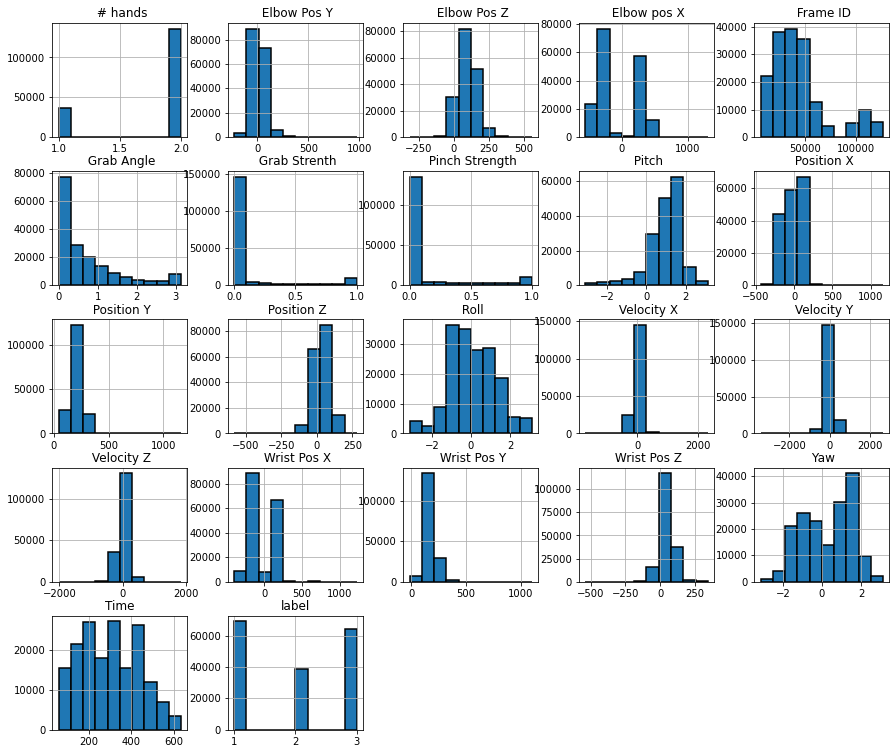

In [316]:
df.hist(edgecolor='black', linewidth=1.5)
fig=plt.gcf()
fig.set_size_inches(15,13)
plt.show()